# Fraud Detection

### Importing Libraries

In [126]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from src.utils import check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical, summarize_time
from src.plots import display_summary_table, plot_bar_charts,plot_time_series, plot_histograms, plot_categorical_numerical
import socket
import struct
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

### Data Analysis and Preprocessing

#### Loading Data

In [2]:
df_creditcard = pd.read_csv('../data/creditcard.csv')
df_fraud = pd.read_csv('../data/Fraud_Data.csv')
df_ipaddress = pd.read_csv('../data/IpAddress_to_Country.csv')

In [3]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#### Handle Missing Values

In [6]:
check_missing_data(df_creditcard)

'Success: No missing values.'

In [7]:
check_missing_data(df_fraud)

'Success: No missing values.'

In [8]:
check_missing_data(df_ipaddress)

'Success: No missing values.'

In [9]:
print(len(df_creditcard))

284807


In [10]:
print(len(df_fraud))

151112


In [11]:
print(len(df_ipaddress))

138846


#### Data Cleaning

In [12]:
df_creditcard = df_creditcard.drop_duplicates()

In [13]:
print(len(df_creditcard))

283726


In [14]:
df_fraud = df_fraud.drop_duplicates()

In [15]:
print(len(df_fraud))

151112


In [16]:
df_ipaddress = df_ipaddress.drop_duplicates()

In [17]:
print(len(df_ipaddress))

138846


In [18]:
df_creditcard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [19]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [20]:
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

In [21]:
df_fraud['device_id'] = df_fraud['device_id'].astype(str)
df_fraud['browser'] = df_fraud['browser'].astype(str)
df_fraud['age'] = df_fraud['age'].astype(int)
df_fraud['source'] = df_fraud['source'].astype(str)

In [22]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [23]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int32         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(4)
memory usage: 12.1+ MB


In [24]:
df_ipaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


#### Categorization

In [25]:
df_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
df_creditcard_num = df_creditcard[['Amount']]


In [27]:
df_creditcard_cat = df_creditcard[['Class']]

In [28]:
df_creditcard_time = df_creditcard[['Time']]

In [29]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [30]:
print(df_fraud.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


In [31]:
df_fraud_num = df_fraud[['purchase_value', 'age']]

In [32]:
df_fraud_cat = df_fraud[[ 'source', 'browser', 'sex', 'class']]

In [33]:
df_fraud_time = df_fraud[['signup_time', 'purchase_time']]

In [34]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [35]:
df_ipaddress_cat = df_ipaddress[['country']]

#### Exploratory Data Analysis

##### Univariate Analysis

In [36]:
fraud_cat_summary = summarize_categorical(df_fraud_cat)
display_summary_table(fraud_cat_summary)


source:
+----+----------+---------+
|    | source   |   count |
|----+----------+---------|
|  0 | SEO      |   60615 |
|  1 | Ads      |   59881 |
|  2 | Direct   |   30616 |
+----+----------+---------+

browser:
+----+-----------+---------+
|    | browser   |   count |
|----+-----------+---------|
|  0 | Chrome    |   61432 |
|  1 | IE        |   36727 |
|  2 | Safari    |   24667 |
|  3 | FireFox   |   24610 |
|  4 | Opera     |    3676 |
+----+-----------+---------+

sex:
+----+-------+---------+
|    | sex   |   count |
|----+-------+---------|
|  0 | M     |   88293 |
|  1 | F     |   62819 |
+----+-------+---------+

class:
+----+---------+---------+
|    |   class |   count |
|----+---------+---------|
|  0 |       0 |  136961 |
|  1 |       1 |   14151 |
+----+---------+---------+


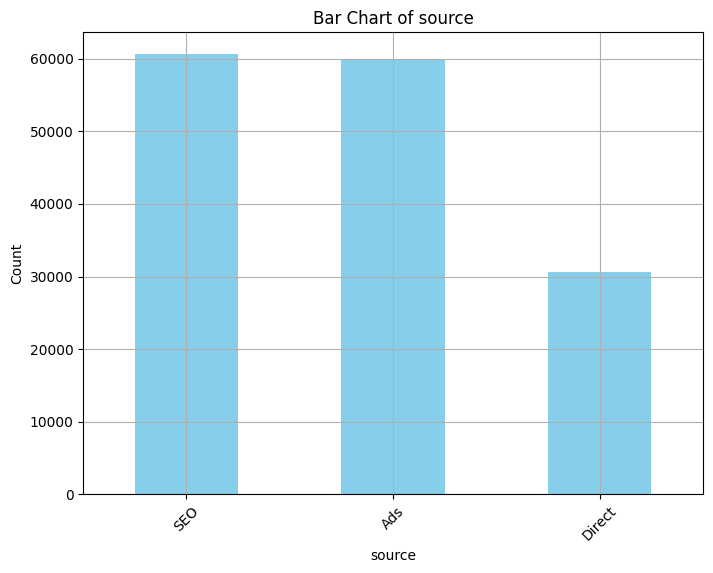

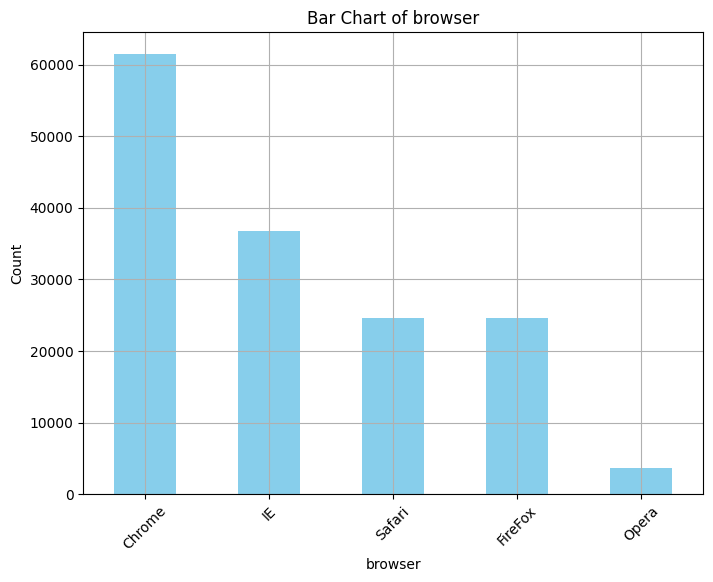

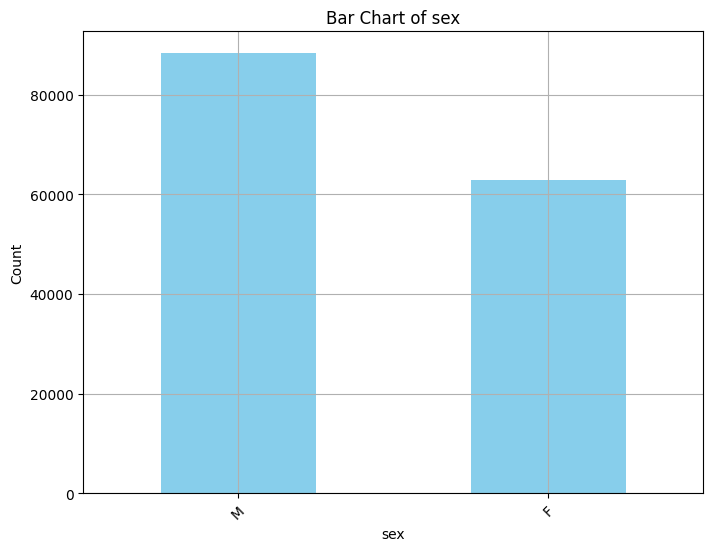

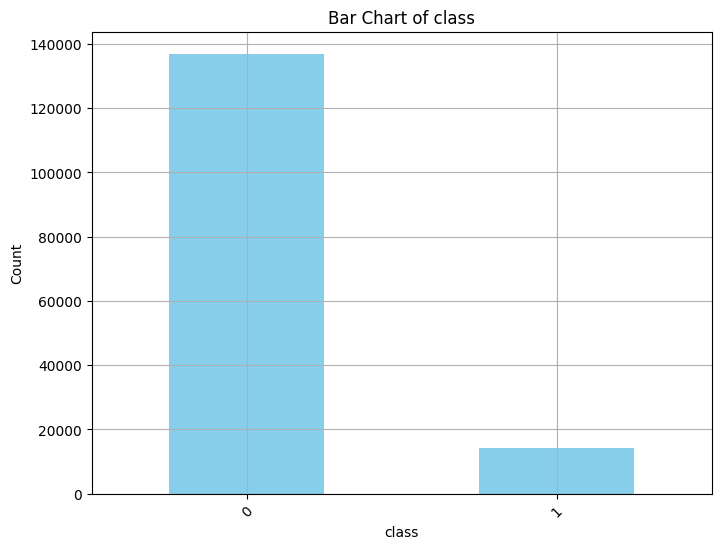

In [37]:
plot_bar_charts(df_fraud_cat)

In [38]:
fraud_num_desc = describe_numerical(df_fraud_num)
display_summary_table(fraud_num_desc)


purchase_value:
+----+---------+------------------+
|    | index   |   purchase_value |
|----+---------+------------------|
|  0 | count   |      151112      |
|  1 | mean    |          36.9354 |
|  2 | std     |          18.3228 |
|  3 | min     |           9      |
|  4 | 25%     |          22      |
|  5 | 50%     |          35      |
|  6 | 75%     |          49      |
|  7 | max     |         154      |
+----+---------+------------------+

age:
+----+---------+--------------+
|    | index   |          age |
|----+---------+--------------|
|  0 | count   | 151112       |
|  1 | mean    |     33.1407  |
|  2 | std     |      8.61773 |
|  3 | min     |     18       |
|  4 | 25%     |     27       |
|  5 | 50%     |     33       |
|  6 | 75%     |     39       |
|  7 | max     |     76       |
+----+---------+--------------+


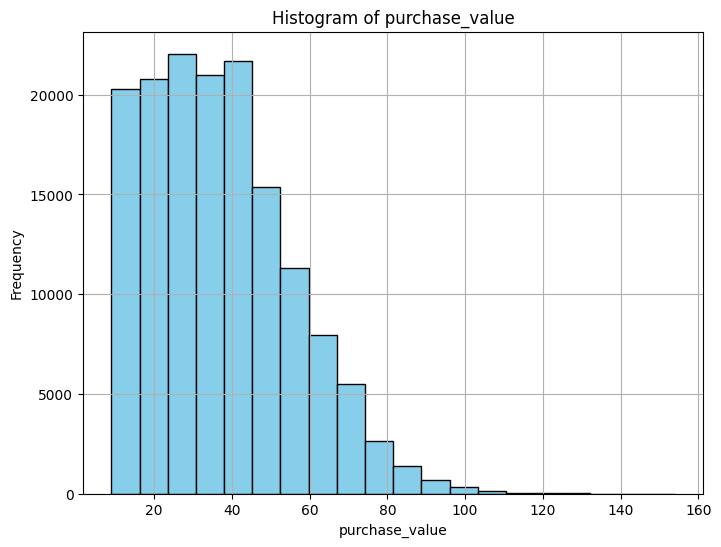

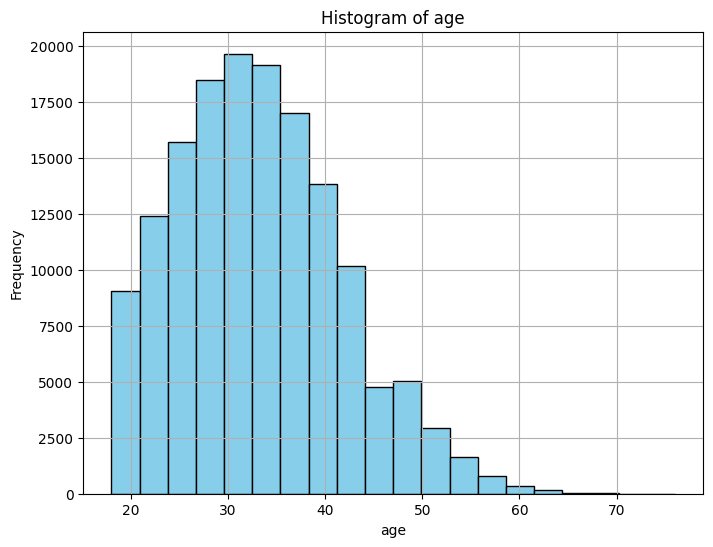

In [39]:
plot_histograms(df_fraud_num)

In [40]:
df_creditcard_cat.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [41]:
creditcard_cat_summary = summarize_categorical(df_creditcard_cat)
display_summary_table(creditcard_cat_summary)


Class:
+----+---------+---------+
|    |   Class |   count |
|----+---------+---------|
|  0 |       0 |  283253 |
|  1 |       1 |     473 |
+----+---------+---------+


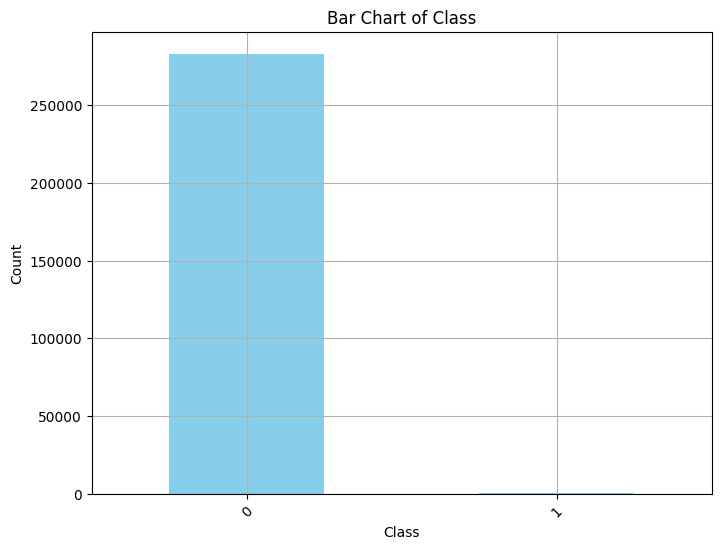

In [42]:
plot_bar_charts(df_creditcard_cat)

In [43]:
df_creditcard_num.head()

,Amount
0,149.62
1,2.69
2,378.66
3,123.50
4,69.99


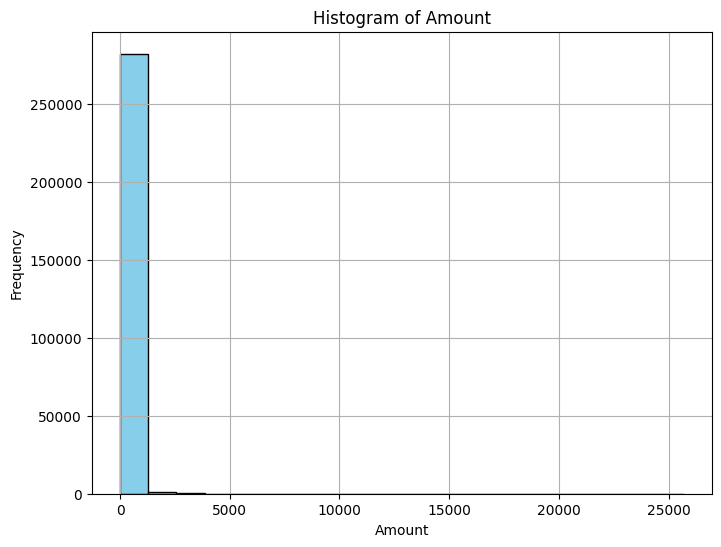

In [44]:
plot_histograms(df_creditcard_num)

In [45]:
df_ipaddress_cat.head()
print(df_ipaddress_cat.columns)

Index(['country'], dtype='object')


In [46]:
ipaddress_cat_summary = summarize_categorical(df_ipaddress_cat)
display_summary_table(ipaddress_cat_summary)


country:
+-----+---------------------------------------+---------+
|     | country                               |   count |
|-----+---------------------------------------+---------|
|   0 | United States                         |   46868 |
|   1 | Canada                                |    6989 |
|   2 | Russian Federation                    |    6739 |
|   3 | Australia                             |    6316 |
|   4 | Germany                               |    5999 |
|   5 | United Kingdom                        |    5401 |
|   6 | Brazil                                |    4885 |
|   7 | China                                 |    3725 |
|   8 | Poland                                |    3042 |
|   9 | Japan                                 |    3005 |
|  10 | Ukraine                               |    2903 |
|  11 | France                                |    2892 |
|  12 | Netherlands                           |    2509 |
|  13 | Switzerland                           |    1821 |
|  1

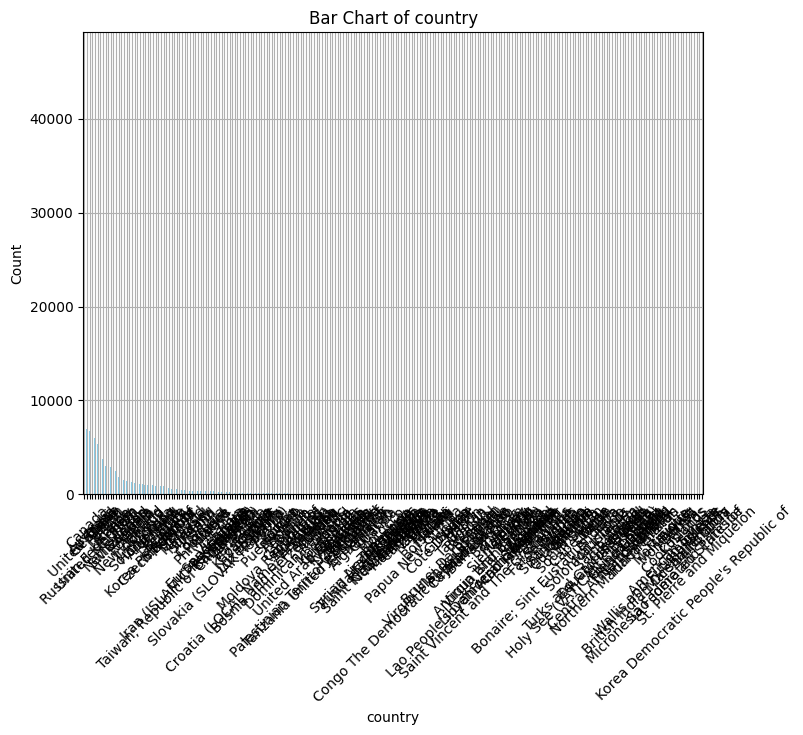

In [47]:
plot_bar_charts(df_ipaddress_cat)

##### Bivariate analysis

In [48]:
summarize_time(df_fraud, 'purchase_time')

Number of Unique Dates: 150679
Start Date: 2015-01-01 00:00:44
End Date: 2015-12-16 02:56:05


In [49]:
summarize_time(df_fraud, 'signup_time')

Number of Unique Dates: 151112
Start Date: 2015-01-01 00:00:42
End Date: 2015-08-18 04:40:29


In [50]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


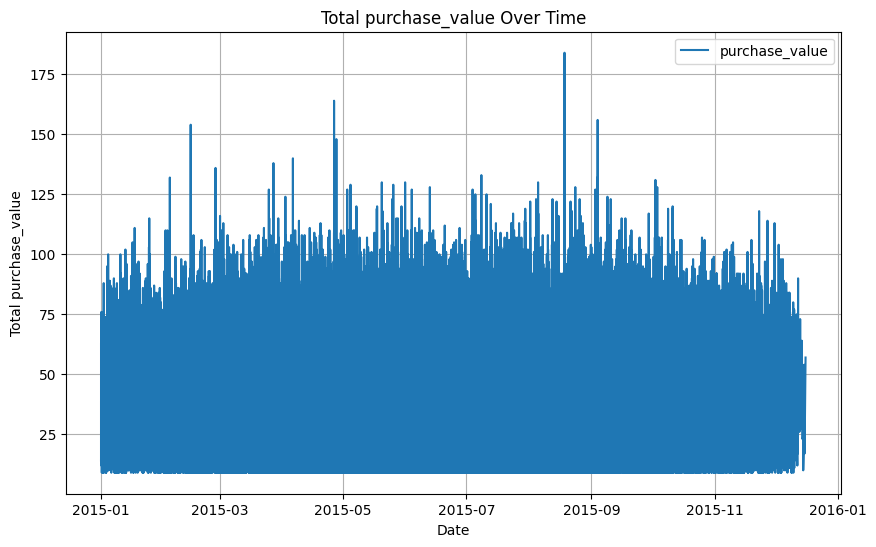

In [51]:
plot_time_series(df_fraud, 'purchase_time', 'purchase_value')

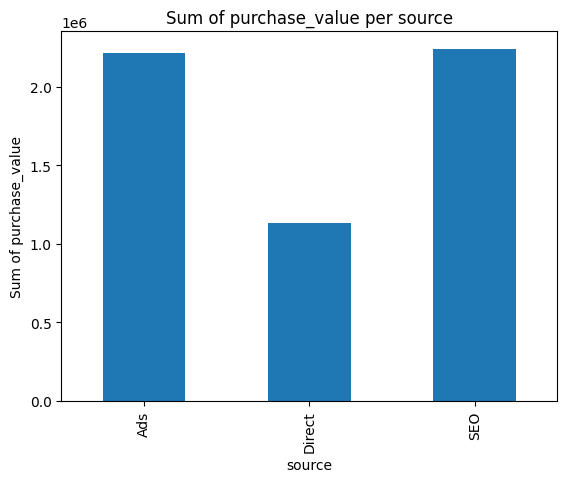

In [52]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'source')

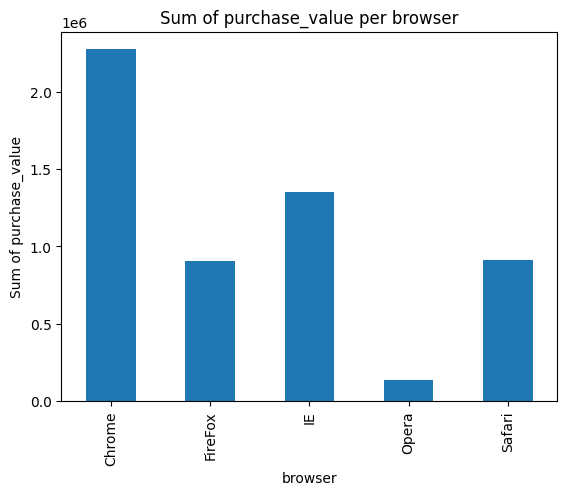

In [53]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'browser')

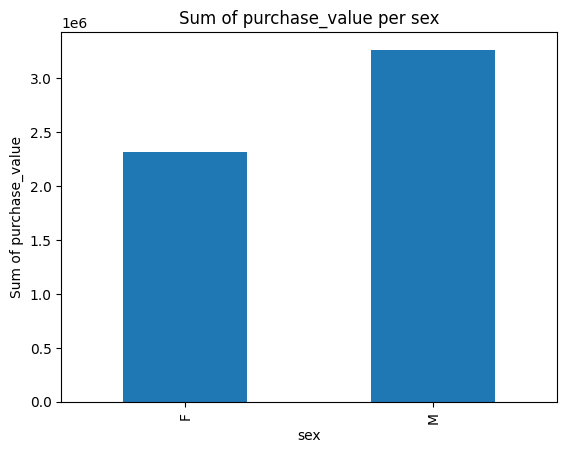

In [54]:
plot_categorical_numerical(df_fraud, 'purchase_value', 'sex')

#### Merge Datesets

In [55]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [56]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int32         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(4)
memory usage: 12.1+ MB


In [57]:
df_ipaddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [58]:
# Function to convert IP address to integer
def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [59]:
df_ipaddress['lower_bound_ip_address'] = df_ipaddress['lower_bound_ip_address'].astype(int)
df_ipaddress['upper_bound_ip_address'] = df_ipaddress['upper_bound_ip_address'].astype(int)
df_fraud['ip_address'] = df_fraud['ip_address'].astype(int)

In [60]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int32         
 9   ip_address      151112 non-null  int32         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int32(2), int64(3), object(4)
memory usage: 11.5+ MB


In [61]:
df_ipaddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int32 
 1   upper_bound_ip_address  138846 non-null  int32 
 2   country                 138846 non-null  object
dtypes: int32(2), object(1)
memory usage: 2.1+ MB


In [62]:
print(len(df_fraud))

151112


In [63]:
print(len(df_ipaddress))

138846


In [64]:
for i, row in df_fraud.iterrows():
    # Find the matching row in df_ipaddress
    matched_row = df_ipaddress[(df_ipaddress['lower_bound_ip_address'] <= row['ip_address']) & (df_ipaddress['upper_bound_ip_address'] >= row['ip_address'])]
    
    # If a match was found, merge the country information
    if not matched_row.empty:
        df_fraud.at[i, 'country'] = matched_row['country'].values[0]

In [65]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,Romania
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,Romania
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


In [66]:
check_missing_data(df_fraud)

,Column Name,Missing Values,Percentage Missing
11,country,2264,1.498226


In [67]:
#Clean data
df_fraud['country'] = df_fraud['country'].fillna('Unknown')

In [68]:
check_missing_data(df_fraud)

'Success: No missing values.'

#### Feature Engineering 

In [69]:
print(df_fraud.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')


In [70]:
# Transaction frequency
df_fraud['transaction_frequency'] = df_fraud.groupby('user_id')['user_id'].transform('count')

In [71]:
# Transaction velocity
df_fraud['transaction_velocity'] = df_fraud.groupby('user_id')['purchase_time'].transform(lambda x: x.max() - x.min())

In [72]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   user_id                151112 non-null  int64          
 1   signup_time            151112 non-null  datetime64[ns] 
 2   purchase_time          151112 non-null  datetime64[ns] 
 3   purchase_value         151112 non-null  int64          
 4   device_id              151112 non-null  object         
 5   source                 151112 non-null  object         
 6   browser                151112 non-null  object         
 7   sex                    151112 non-null  object         
 8   age                    151112 non-null  int32          
 9   ip_address             151112 non-null  int32          
 10  class                  151112 non-null  int64          
 11  country                151112 non-null  object         
 12  transaction_frequency  151112 

In [73]:
# Extract hour of day and day of week from 'signup_time' and 'purchase_time'
df_fraud['signup_hour_of_day'] = df_fraud['signup_time'].dt.hour
df_fraud['signup_day_of_week'] = df_fraud['signup_time'].dt.dayofweek

df_fraud['purchase_hour_of_day'] = df_fraud['purchase_time'].dt.hour
df_fraud['purchase_day_of_week'] = df_fraud['purchase_time'].dt.dayofweek

In [74]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,1,0 days,22,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0 days,20,6,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,Romania,1,0 days,18,3,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,Romania,1,0 days,21,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,1,0 days,7,1,18,2


#### Encode Categorical Features

In [75]:
# Create a label encoder object
le = LabelEncoder()

In [76]:
# Create a list with the names of all categorical columns to encode
columns_to_encode = ['device_id', 'source', 'browser', 'sex', 'country']

In [77]:
# Apply the label encoder to the columns in the list
for column in columns_to_encode:
    df_fraud[column] = le.fit_transform(df_fraud[column])

In [78]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,2,0,1,39,732758368,0,61,1,0 days,22,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,0,0,0,53,350311387,0,136,1,0 days,20,6,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,2,3,1,53,-2147483648,1,107,1,0 days,18,3,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,3977,2,4,1,41,-2147483648,0,107,1,0 days,21,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,68757,0,4,1,45,415583117,0,136,1,0 days,7,1,18,2


#### Normalization and Scaling

In [79]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,89215,2,0,1,39,732758368,0,61,1,0 days,22,1,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,24078,0,0,0,53,350311387,0,136,1,0 days,20,6,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,131216,2,3,1,53,-2147483648,1,107,1,0 days,18,3,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,3977,2,4,1,41,-2147483648,0,107,1,0 days,21,1,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,68757,0,4,1,45,415583117,0,136,1,0 days,7,1,18,2


In [80]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   user_id                151112 non-null  int64          
 1   signup_time            151112 non-null  datetime64[ns] 
 2   purchase_time          151112 non-null  datetime64[ns] 
 3   purchase_value         151112 non-null  int64          
 4   device_id              151112 non-null  int32          
 5   source                 151112 non-null  int32          
 6   browser                151112 non-null  int32          
 7   sex                    151112 non-null  int32          
 8   age                    151112 non-null  int32          
 9   ip_address             151112 non-null  int32          
 10  class                  151112 non-null  int64          
 11  country                151112 non-null  int32          
 12  transaction_frequency  151112 

In [81]:
# Create a scaler object
scaler = MinMaxScaler()

In [82]:
# Convert transaction_velocity to seconds, then to float type before scaling
df_fraud['transaction_velocity'] = df_fraud['transaction_velocity'].dt.total_seconds().astype(float)

In [83]:
# Create a list with the names of all columns to scale
columns_to_scale = ['user_id', 'purchase_value', 'age', 'ip_address', 'transaction_frequency', 'transaction_velocity', 'signup_hour_of_day', 'signup_day_of_week', 'purchase_hour_of_day', 'purchase_day_of_week', 'device_id', 'source', 'browser', 'sex', 'country']

In [84]:
# Apply the scaler to the columns in the list
df_fraud[columns_to_scale] = scaler.fit_transform(df_fraud[columns_to_scale])

In [85]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,0.646696,1.0,0.00,1.0,0.362069,0.670613,0,0.432624,0.0,0.0,0.956522,0.166667,0.086957,0.833333
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,0.174535,0.0,0.00,0.0,0.603448,0.581567,0,0.964539,0.0,0.0,0.869565,1.000000,0.043478,0.000000
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,0.951151,1.0,0.75,1.0,0.603448,0.000000,1,0.758865,0.0,0.0,0.782609,0.500000,0.782609,0.500000
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,0.028828,1.0,1.00,1.0,0.396552,0.000000,0,0.758865,0.0,0.0,0.913043,0.166667,0.565217,0.000000
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,0.498402,0.0,1.00,1.0,0.465517,0.596764,0,0.964539,0.0,0.0,0.304348,0.166667,0.782609,0.333333


### Model Building and Training

#### Data Preparation

In [86]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,0.646696,1.0,0.00,1.0,0.362069,0.670613,0,0.432624,0.0,0.0,0.956522,0.166667,0.086957,0.833333
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,0.174535,0.0,0.00,0.0,0.603448,0.581567,0,0.964539,0.0,0.0,0.869565,1.000000,0.043478,0.000000
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,0.951151,1.0,0.75,1.0,0.603448,0.000000,1,0.758865,0.0,0.0,0.782609,0.500000,0.782609,0.500000
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,0.028828,1.0,1.00,1.0,0.396552,0.000000,0,0.758865,0.0,0.0,0.913043,0.166667,0.565217,0.000000
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,0.498402,0.0,1.00,1.0,0.465517,0.596764,0,0.964539,0.0,0.0,0.304348,0.166667,0.782609,0.333333


In [87]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                151112 non-null  float64       
 1   signup_time            151112 non-null  datetime64[ns]
 2   purchase_time          151112 non-null  datetime64[ns]
 3   purchase_value         151112 non-null  float64       
 4   device_id              151112 non-null  float64       
 5   source                 151112 non-null  float64       
 6   browser                151112 non-null  float64       
 7   sex                    151112 non-null  float64       
 8   age                    151112 non-null  float64       
 9   ip_address             151112 non-null  float64       
 10  class                  151112 non-null  int64         
 11  country                151112 non-null  float64       
 12  transaction_frequency  151112 non-null  floa

In [88]:
# Apply the scaler to the columns in the list
df_fraud[columns_to_scale] = scaler.fit_transform(df_fraud[columns_to_scale])

In [89]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,0.055140,2015-02-24 22:55:49,2015-04-18 02:47:11,0.172414,0.646696,1.0,0.00,1.0,0.362069,0.670613,0,0.432624,0.0,0.0,0.956522,0.166667,0.086957,0.833333
1,0.833299,2015-06-07 20:39:50,2015-06-08 01:38:54,0.048276,0.174535,0.0,0.00,0.0,0.603448,0.581567,0,0.964539,0.0,0.0,0.869565,1.000000,0.043478,0.000000
2,0.003393,2015-01-01 18:52:44,2015-01-01 18:52:45,0.041379,0.951151,1.0,0.75,1.0,0.603448,0.000000,1,0.758865,0.0,0.0,0.782609,0.500000,0.782609,0.500000
3,0.375207,2015-04-28 21:13:25,2015-05-04 13:54:50,0.241379,0.028828,1.0,1.00,1.0,0.396552,0.000000,0,0.758865,0.0,0.0,0.913043,0.166667,0.565217,0.000000
4,0.553410,2015-07-21 07:09:52,2015-09-09 18:40:53,0.206897,0.498402,0.0,1.00,1.0,0.465517,0.596764,0,0.964539,0.0,0.0,0.304348,0.166667,0.782609,0.333333


In [90]:
df_fraud_cp1 = df_fraud

In [91]:
# Define the feature columns
feature_columns = df_fraud.columns.drop(['class', 'signup_time', 'purchase_time'])


In [92]:
# Define the target column
target_column = 'class'

In [93]:
# Separate the features and the target
X = df_fraud[feature_columns]
y = df_fraud[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,country,transaction_frequency,transaction_velocity,signup_hour_of_day,signup_day_of_week,purchase_hour_of_day,purchase_day_of_week
0,0.055140,0.172414,0.646696,1.0,0.00,1.0,0.362069,0.670613,0.432624,0.0,0.0,0.956522,0.166667,0.086957,0.833333
1,0.833299,0.048276,0.174535,0.0,0.00,0.0,0.603448,0.581567,0.964539,0.0,0.0,0.869565,1.000000,0.043478,0.000000
2,0.003393,0.041379,0.951151,1.0,0.75,1.0,0.603448,0.000000,0.758865,0.0,0.0,0.782609,0.500000,0.782609,0.500000
3,0.375207,0.241379,0.028828,1.0,1.00,1.0,0.396552,0.000000,0.758865,0.0,0.0,0.913043,0.166667,0.565217,0.000000
4,0.553410,0.206897,0.498402,0.0,1.00,1.0,0.465517,0.596764,0.964539,0.0,0.0,0.304348,0.166667,0.782609,0.333333


In [95]:
# checking for imbalance data
y_train_summary = y_train.value_counts()
print(y_train_summary)

class
0    109588
1     11301
Name: count, dtype: int64


In [96]:
# checking for imbalance data
y_test_summary = y_test.value_counts()
print(y_test_summary)

class
0    27373
1     2850
Name: count, dtype: int64


In [97]:
# Print the shapes of the training and testing sets
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set: X_train: (120889, 15), y_train: (120889,)
Testing set: X_test: (30223, 15), y_test: (30223,)


In [98]:
print(df_fraud.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'transaction_frequency', 'transaction_velocity',
       'signup_hour_of_day', 'signup_day_of_week', 'purchase_hour_of_day',
       'purchase_day_of_week'],
      dtype='object')


#### Supervised Machine Learning Algorithms

##### Logistic Regression

In [99]:
# Define the model
lr_model = LogisticRegression(random_state=42)

In [100]:
# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##### Decision Tree

In [101]:
# Define the model
dtc_model = DecisionTreeClassifier(random_state=42)

In [102]:
# Train the model
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Random Forest

In [103]:
# Define the model
rfc_model = RandomForestClassifier(random_state=42)

In [104]:
# Train the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Gradient Boosting

In [105]:
# Define the model
gbc_model = GradientBoostingClassifier(random_state=42)

In [106]:
# Train the model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Artifical Neural Networks

##### Multi-Layer Perceptron (MLP)

In [107]:
# Create an instance of MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [108]:
# Train the model
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

##### Long Short-Term Memory (LSTM)

In [114]:
print(df_fraud_cp1.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'transaction_frequency', 'transaction_velocity',
       'signup_hour_of_day', 'signup_day_of_week', 'purchase_hour_of_day',
       'purchase_day_of_week'],
      dtype='object')


In [115]:
df_sorted = df_fraud_cp1.sort_values(by='purchase_time')

In [116]:
time_series_data = df_sorted[['class']].values

In [119]:
# Prepare time series data
def create_supervised_data(data, n_in=1, n_out=1):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_in
        if end_ix + n_out > len(data):
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix:end_ix + n_out]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [123]:
# n_out=1, since we want to detect the transaction at the next time step
X, y = create_supervised_data(time_series_data, n_in=30, n_out=1)

In [124]:
# Reshape input to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [127]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))  # Use sigmoid activation for binary classification

In [128]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use binary crossentropy as loss function for binary classification

In [129]:
# Train the model
lstm_model.fit(X, y, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9500 - loss: 0.2476 - val_accuracy: 0.9540 - val_loss: 0.1910
Epoch 2/5
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.9547 - loss: 0.1892 - val_accuracy: 0.9540 - val_loss: 0.1865
Epoch 3/5
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.9547 - loss: 0.1866 - val_accuracy: 0.9540 - val_loss: 0.1870
Epoch 4/5
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.9530 - loss: 0.1910 - val_accuracy: 0.9540 - val_loss: 0.1865
Epoch 5/5
3778/3778 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.9542 - loss: 0.1861 - val_accuracy: 0.9540 - val_loss: 0.1865
